# 27.7 Neural Network Challenge - Wine Quality 

## Objective

Create a multi-layer perceptron neural network model to predict on a labeled dataset of your choosing. Compare this model to either a boosted tree or a random forest model and describe the relative tradeoffs between complexity and accuracy. Be sure to vary the hyperparameters of your MLP!

## Data

These datasets were found on the UCI Machine Learning Website (https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 

Source: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009

The quality scores within the datasets were given by professional wine sommeliers. The wines evaluated are variants of the Portuguese Vinho Verde wines. Due to privacy and logistic issues, the dataset only contains physiochemical statistics for each of the wines. Brand names and prices are not given. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import statsmodels.api as sm
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize
%matplotlib inline
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
red_wine = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\winequality-red.csv', sep =';')
white_wine = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\winequality-white.csv', sep =';')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
#missing value evaluation
total_missing = red_wine.isnull().sum().sort_values(ascending=False)
percent_missing = (red_wine.isnull().sum()/red_wine.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
quality,0,0.0
alcohol,0,0.0
sulphates,0,0.0
pH,0,0.0
density,0,0.0
total sulfur dioxide,0,0.0
free sulfur dioxide,0,0.0
chlorides,0,0.0
residual sugar,0,0.0
citric acid,0,0.0


In [8]:
#missing value evaluation
total_missing = white_wine.isnull().sum().sort_values(ascending=False)
percent_missing = (white_wine.isnull().sum()/white_wine.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
quality,0,0.0
alcohol,0,0.0
sulphates,0,0.0
pH,0,0.0
density,0,0.0
total sulfur dioxide,0,0.0
free sulfur dioxide,0,0.0
chlorides,0,0.0
residual sugar,0,0.0
citric acid,0,0.0


### Feature Summary

- Alcohol - percent alcohol by volume
- Sulphates - grams pottasium sulphate per cubic decimeter
- pH - ranges from 0-14, measures the amount of hydrogen/hydroxyl ions present in water
- Density - grams per milliliter, density is commonly associated with mouthfeel in beverages
- Total Sulfur Dioxide - milligrams per cubic decimeter, the amount of free plus bound sulfur dioxide present in wine
- Free Sulfur Dioxide - milligrams per cubic decimeter, the amount of unbound sulfur dioxide, prevents oxidation/microbial growth
- Chlorides - grams of sodium chloride (salt) per cubic decimter
- Residual Sugar - grams per cubic decimeter, the sugar left over after fermentation ends
- Citric Acid - grams per cubic decimeter, citric acid is present in small amounts in wine. Citric acid can enhance freshness of wine and enhance certain flavors such as fruity notes.
- Volatile Acidity - grams acetic acid per cubic decimeter, acetic acid is a byproduct of fermentation and at high levels it can give an off, vinegar like flavor
- Fixed Acidity - grams tartaric acid per cubic decimeter, most acids present in wine are fixed. These are acids that are not easily evaporated.

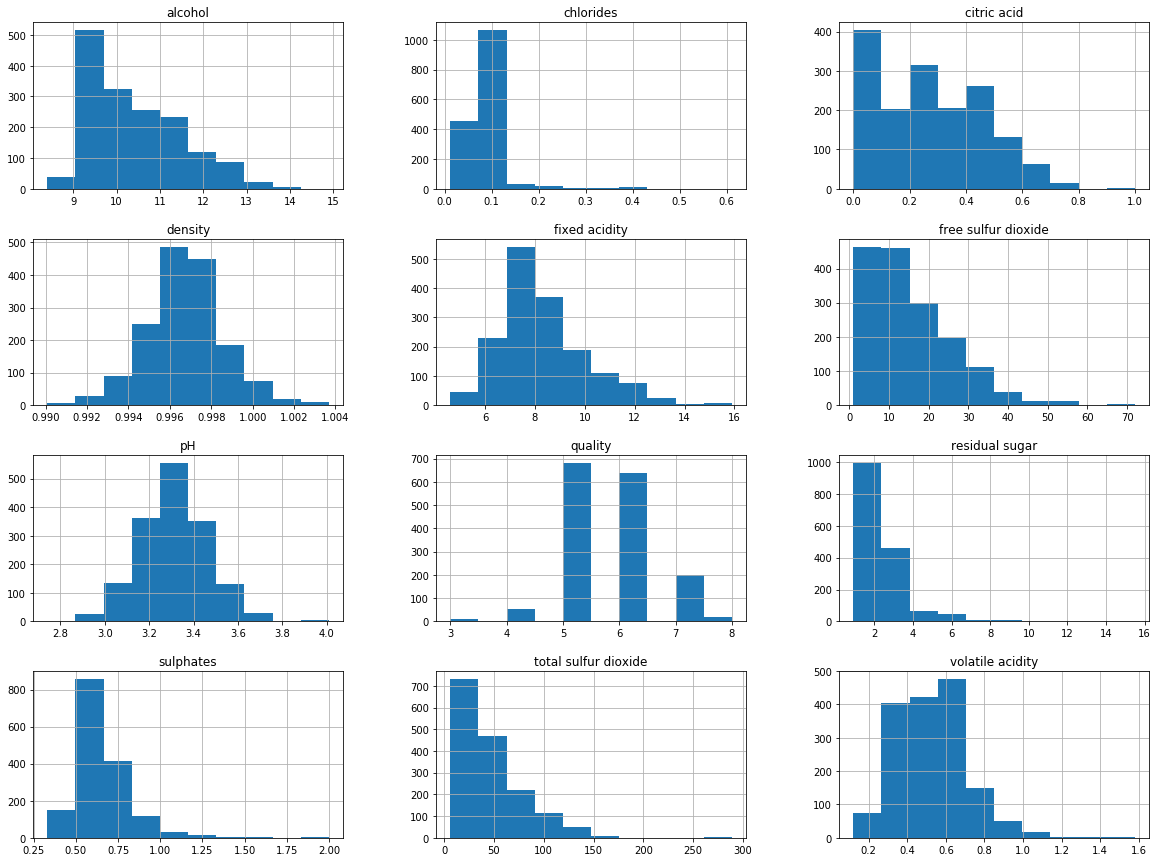

In [9]:
#evaluate data distributions
red_wine.hist(figsize=(20,15))
plt.show()

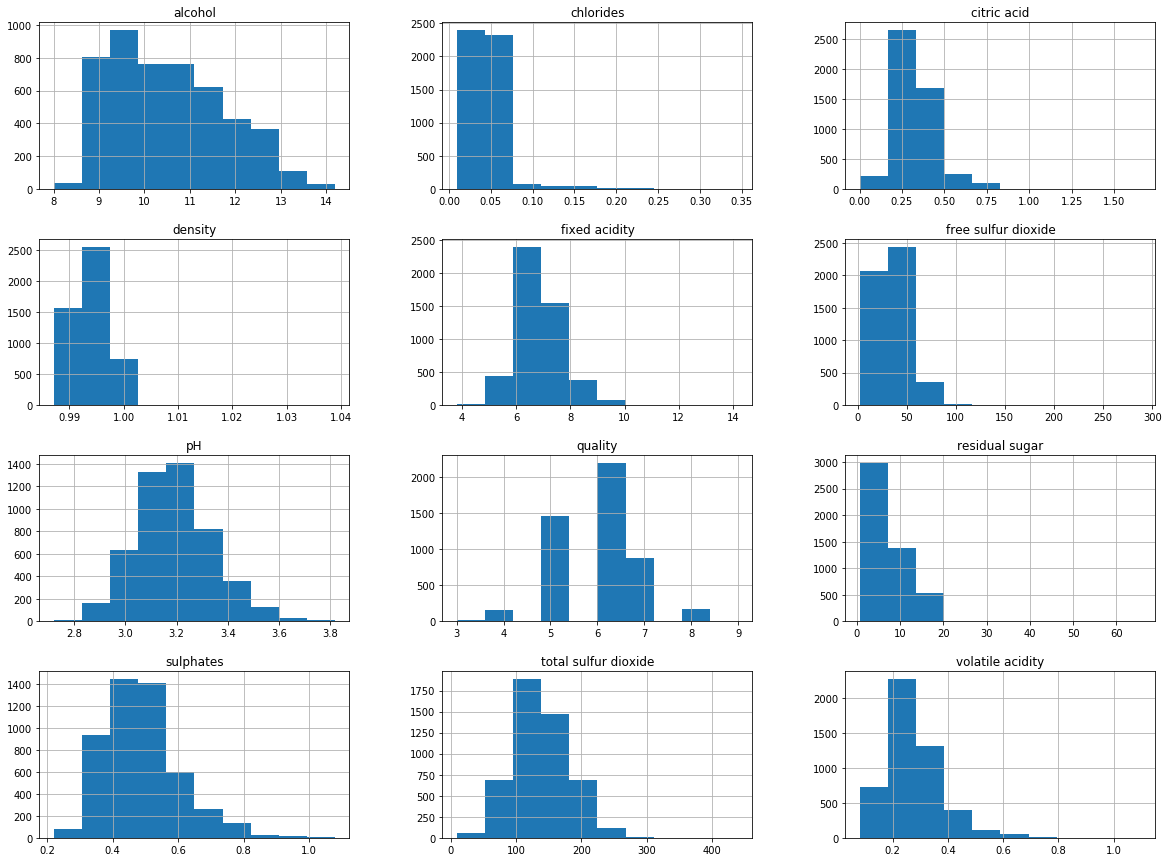

In [10]:
#evaluate data distribution
white_wine.hist(figsize=(20,15))
plt.show()

In [11]:
#what is the quality scale?
print(red_wine['quality'].unique())
print(white_wine['quality'].unique())

[5 6 7 4 8 3]
[6 5 7 8 4 3 9]


Sensory scores range from 3 to 8 or 9 depending on the type of wine. Speaking of types of wine, let's combine the red and white wine datasets into one.

In [12]:
#add type column to each dataframe
red_wine['type'] = 'red'
white_wine['type'] = 'white'

In [13]:
#combine the data into one dataset
combined_data = [red_wine, white_wine]
wine = pd.concat(combined_data)

In [14]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [15]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [17]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


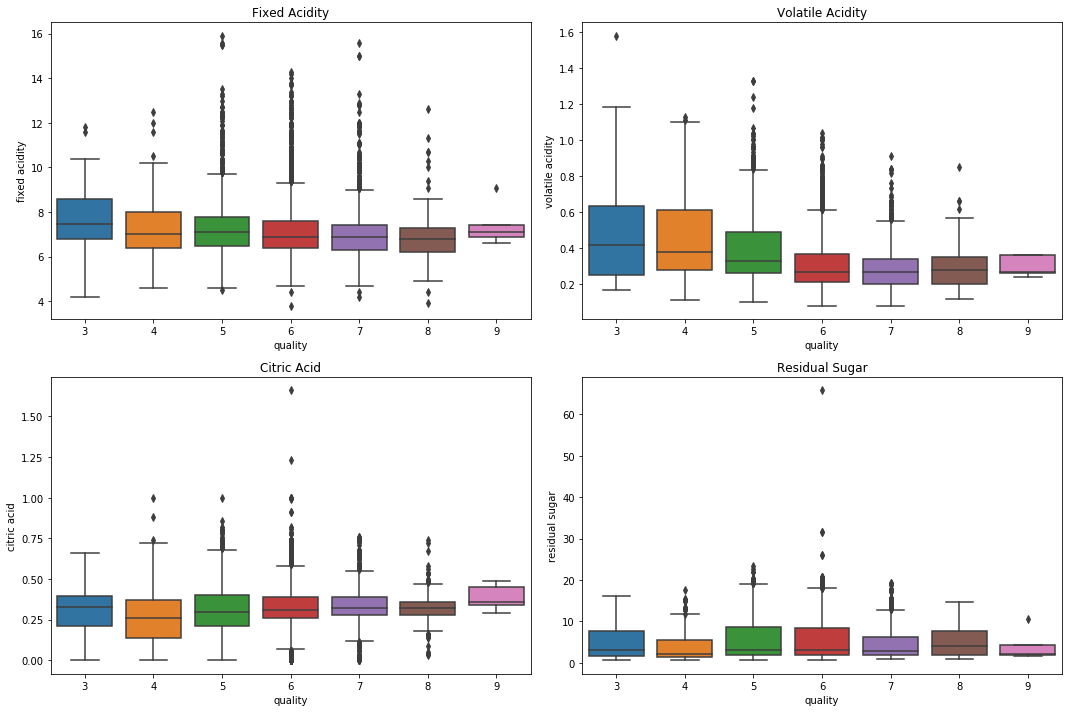

In [18]:
#lets take a closer look at the data
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot('quality', 'fixed acidity', data=wine)
plt.title('Fixed Acidity')

plt.subplot(2,2,2)
sns.boxplot('quality', 'volatile acidity', data=wine)
plt.title('Volatile Acidity')

plt.subplot(2,2,3)
sns.boxplot('quality', 'citric acid', data=wine)
plt.title('Citric Acid')

plt.subplot(2,2,4)
sns.boxplot('quality', 'residual sugar', data=wine)
plt.title('Residual Sugar')

plt.tight_layout()
plt.show()

We can see a few trends here, fixed acidity and volatile acidity have a somewhat negative correlation with quality. It makes sense that wines with volatile acidity score lower as acetic acid is typically a sign of stressed fermentation. There doesn't seem to be much of a trend between residual sugar and quality but citric acid may be highest in the higher scoring wines.

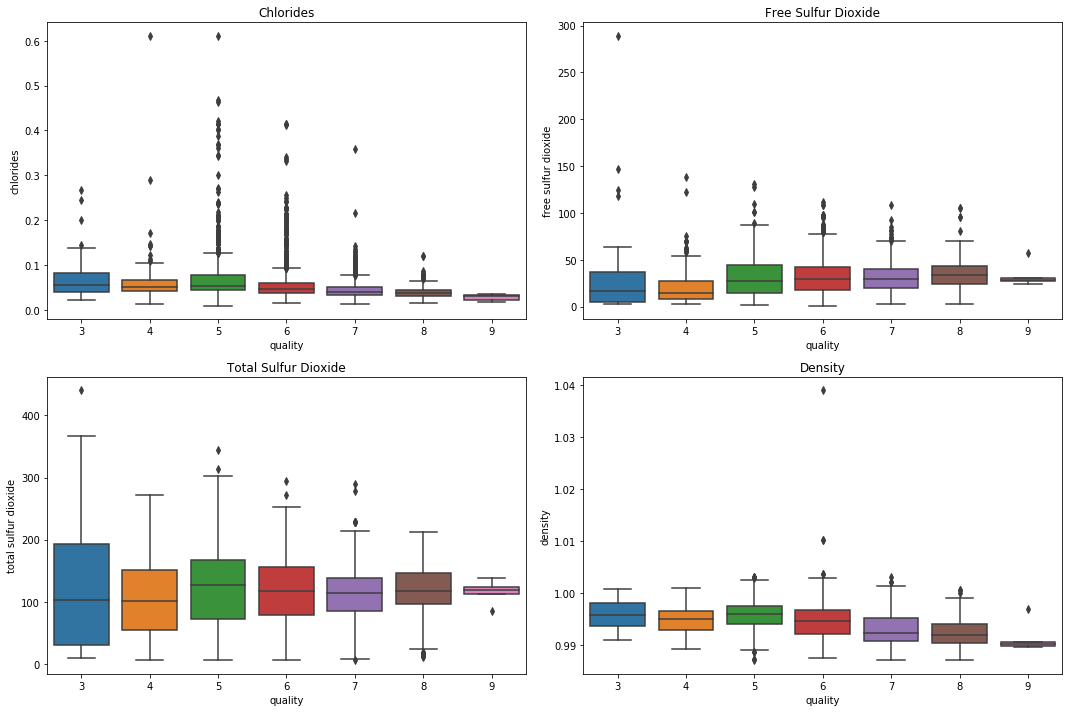

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot('quality', 'chlorides', data=wine)
plt.title('Chlorides')

plt.subplot(2,2,2)
sns.boxplot('quality', 'free sulfur dioxide', data=wine)
plt.title('Free Sulfur Dioxide')

plt.subplot(2,2,3)
sns.boxplot('quality', 'total sulfur dioxide', data=wine)
plt.title('Total Sulfur Dioxide')

plt.subplot(2,2,4)
sns.boxplot('quality', 'density', data=wine)
plt.title('Density')

plt.tight_layout()
plt.show()

Chloride content seems to be lowest among the highest scored wines while free and total sulfur dioxide don't seem to have much of a trend with quality. Density scores are lowest in the highest quality wines.

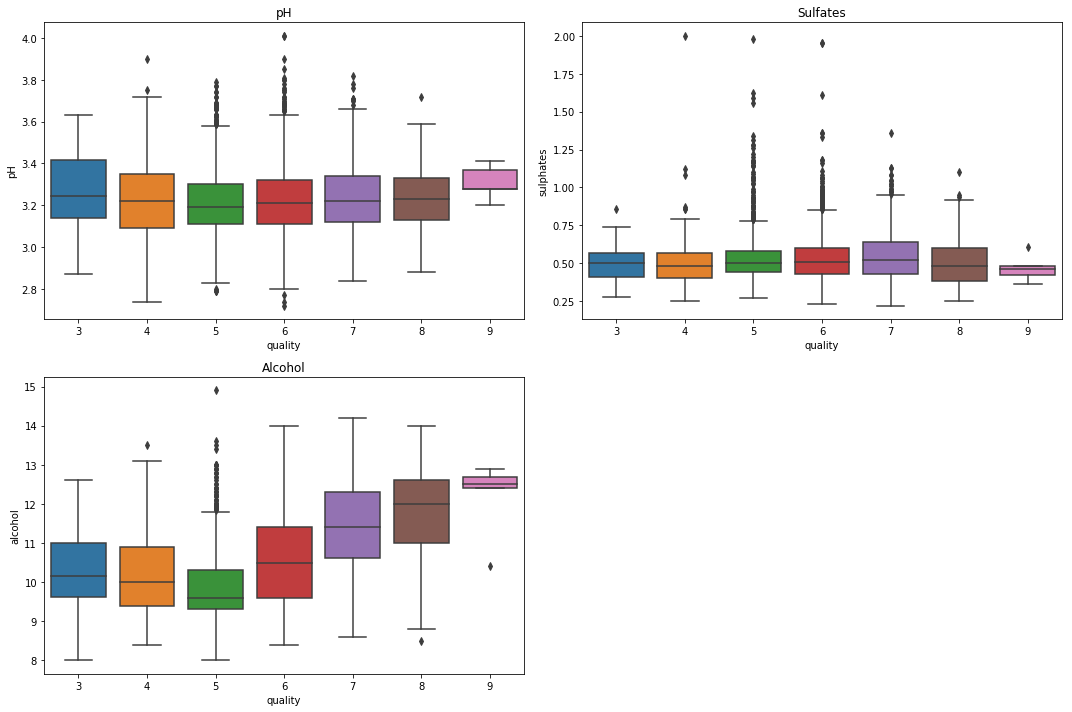

In [20]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot('quality', 'pH', data=wine)
plt.title('pH')

plt.subplot(2,2,2)
sns.boxplot('quality', 'sulphates', data=wine)
plt.title('Sulfates')

plt.subplot(2,2,3)
sns.boxplot('quality', 'alcohol', data=wine)
plt.title('Alcohol')

plt.tight_layout()
plt.show()

pH nor sulphates have much of a trend with quality, but the highest alcohol wines seem to rate the highest.

As can be seen from above, we have some outliers within the dataset. After investigating the dataset, all values are real and should remain, therefore they won't be removed. With these outliers, a robust model must be considered. 

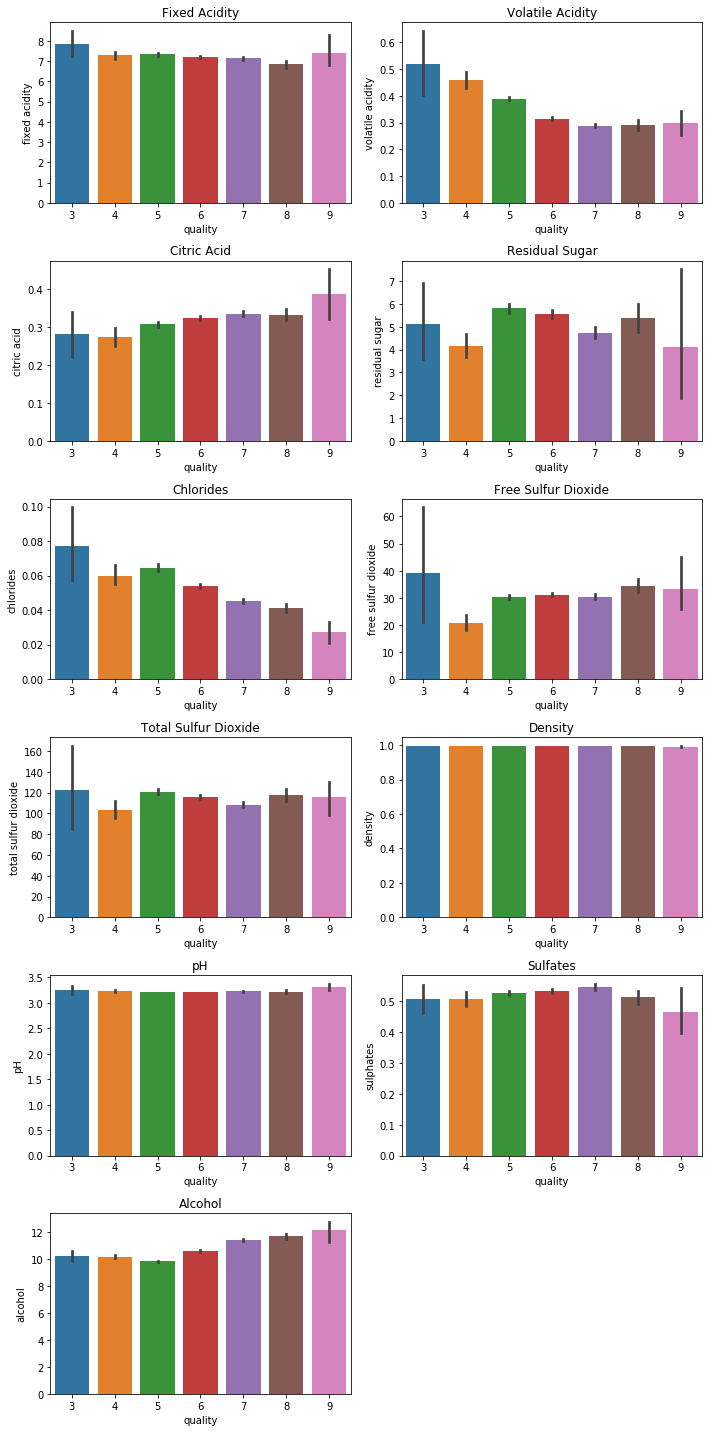

In [21]:
#let's get a different look and use barplots to spot any trends between the quality scores and features

plt.figure(figsize=(10,20))

plt.subplot(6,2,1)
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.title('Fixed Acidity')

plt.subplot(6,2,2)
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
plt.title('Volatile Acidity')

plt.subplot(6,2,3)
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.title('Citric Acid')

plt.subplot(6,2,4)
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
plt.title('Residual Sugar')

plt.subplot(6,2,5)
sns.barplot(x = 'quality', y = 'chlorides', data = wine)
plt.title('Chlorides')

plt.subplot(6,2,6)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)
plt.title('Free Sulfur Dioxide')

plt.subplot(6,2,7)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)
plt.title('Total Sulfur Dioxide')

plt.subplot(6,2,8)
sns.barplot(x = 'quality', y = 'density', data = wine)
plt.title('Density')

plt.subplot(6,2,9)
sns.barplot(x = 'quality', y = 'pH', data = wine)
plt.title('pH')

plt.subplot(6,2,10)
sns.barplot(x = 'quality', y = 'sulphates', data = wine)
plt.title('Sulfates')

plt.subplot(6,2,11)
sns.barplot(x = 'quality', y = 'alcohol', data = wine)
plt.title('Alcohol')



plt.tight_layout()
plt.show()

We can see a few trends from the data above. 

- Volatile acidity seems to decrease with the highest rated wines, again, this makes sense as vinegar like flavors are considered to be "off notes" in alcoholic beverages in general. 
- Citric acid seems to increase with higher scoring wines. This isn't surprising as citric acid is known to highlight fruity flavors, and make flavors in general "pop". It's considered a "magic pixie dust" in the flavor industry.
- Chlorides seems to be negatively correlated with quality. This is somewhat surprising as salt, like citric acid, is commonly used to make flavors pop.
- Alcohol seems to be positively correlated with quality scores. The more alcohol, the better the taste, at least according to this dataset. Alcohol itself doesn't lend many flavor attributes but it is the primary byproduct of the most important process in any alcoholic beverage manufacturing - fermentation.

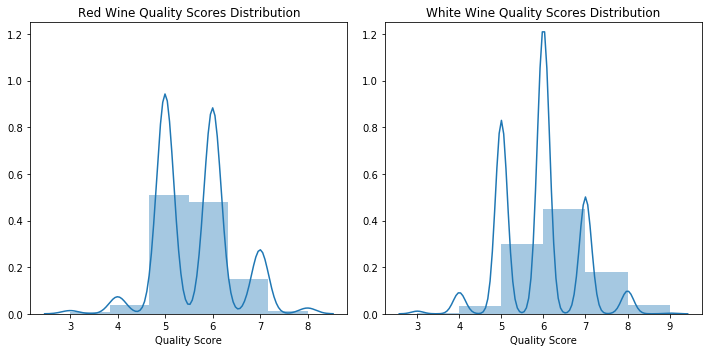

In [22]:
#target distribution
import seaborn as sns

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(red_wine['quality'], bins=6)
plt.title('Red Wine Quality Scores Distribution')
plt.xlabel('Quality Score')
plt.ylim(0, 1.25)

plt.subplot(1,2,2)
sns.distplot(white_wine['quality'], bins=6)
plt.title('White Wine Quality Scores Distribution')
plt.xlabel('Quality Score')
plt.ylim(0, 1.25)

plt.tight_layout()
plt.show()

As one would expect, most wines are just 'meh'. Humans, even professionals, tend to score their beverages inside of the extremes. In wine tasting, scores range from 0 to 10, with 10 being an excellent, world class wine and 0 being terrible. No wine in this entire dataset scored a 0 or a 10.

---

### Target Classification

Lets create two quality classes of wine - high and low. We'll set the score to anything above 6.5 is a high quality wine while anything below is a low quality wine. This is how we will classify our target variable.

In [23]:
quality_class = []
for i in wine['quality']:
    if i >= 1 and i <= 6.5:
        quality_class.append(0)
    elif i > 6.5 and i <= 10:
        quality_class.append(1)
wine['quality_class'] = quality_class

In [24]:
type = []
for i in wine['type']:
    if i == 'red':
        type.append(0)
    elif i == 'white':
        type.append(1)
wine['type'] = type

In [25]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0


In [26]:
#assign our variables

y = wine['quality_class']
X = wine[['alcohol', 'citric acid', 'sulphates', 'pH', 'free sulfur dioxide', 'fixed acidity', 
                    'total sulfur dioxide', 'residual sugar', 'volatile acidity', 'chlorides', 'density','type']]

In [27]:
X

,alcohol,citric acid,sulphates,pH,free sulfur dioxide,fixed acidity,total sulfur dioxide,residual sugar,volatile acidity,chlorides,density,type
0,9.400000,0.00,0.56,3.51,11.0,7.4,34.0,1.90,0.700,0.076,0.99780,0
1,9.800000,0.00,0.68,3.20,25.0,7.8,67.0,2.60,0.880,0.098,0.99680,0
2,9.800000,0.04,0.65,3.26,15.0,7.8,54.0,2.30,0.760,0.092,0.99700,0
3,9.800000,0.56,0.58,3.16,17.0,11.2,60.0,1.90,0.280,0.075,0.99800,0
4,9.400000,0.00,0.56,3.51,11.0,7.4,34.0,1.90,0.700,0.076,0.99780,0
5,9.400000,0.00,0.56,3.51,13.0,7.4,40.0,1.80,0.660,0.075,0.99780,0
6,9.400000,0.06,0.46,3.30,15.0,7.9,59.0,1.60,0.600,0.069,0.99640,0
7,10.000000,0.00,0.47,3.39,15.0,7.3,21.0,1.20,0.650,0.065,0.99460,0
8,9.500000,0.02,0.57,3.36,9.0,7.8,18.0,2.00,0.580,0.073,0.99680,0
9,10.500000,0.36,0.80,3.35,17.0,7.5,102.0,6.10,0.500,0.071,0.99780,0


In [28]:
#split the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13)

In [29]:
#target variable counts
wine['quality_class'].value_counts()

0    5220
1    1277
Name: quality_class, dtype: int64

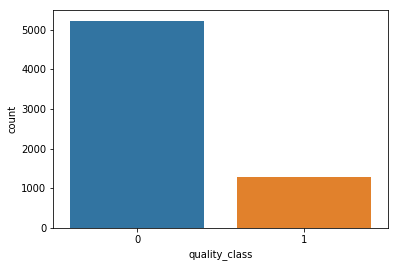

In [30]:
#target variable visualization
sns.countplot(wine['quality_class'])

We have a class imbalance here, but it isn't horrendous. This will be dealt with in our models with the class weight parameter.

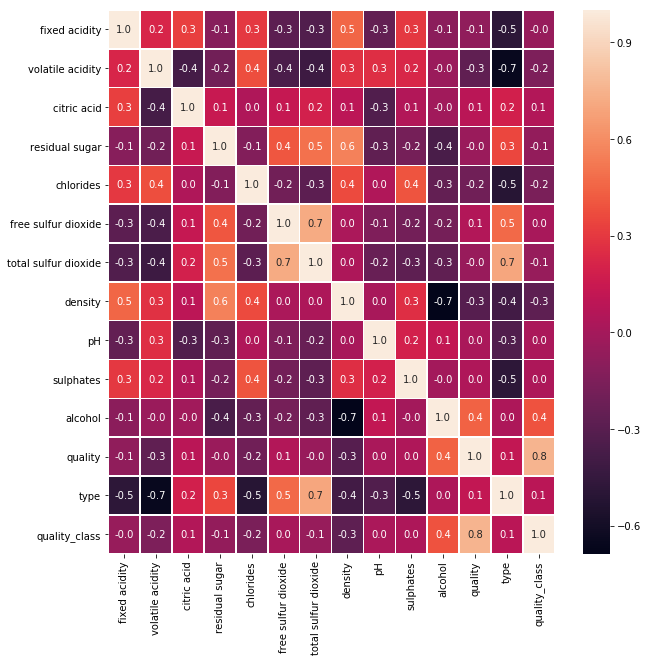

In [31]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

The features we would expect to be correlated are indeed correlated. 

- Density and Alcohol
- Density and Residual Sugar
- Fixed Acidity and Density
- Free Sulfur Dioxide and Total Sulfur Dioxide
- Total Sulfur Dioxide and Residual Sugar - wasn't expecting this to be correlated

## Play with the Models

### Preprocess Pipeline

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [33]:
#use standard scaler as part of the numeric pipeline
#tried using PCA on the dataset but it decreased overall scores across all models

from imblearn.pipeline import Pipeline
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(['alcohol', 'citric acid', 'sulphates', 'pH', 'free sulfur dioxide', 'fixed acidity', 
                    'total sulfur dioxide', 'residual sugar', 'volatile acidity', 'chlorides', 'density'])),
        ('scale', StandardScaler())])

In [34]:
#one hote encode the type feature
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(['type'])),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [35]:
#combine the pipelines
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [36]:
#fit pipeline to the training data
X_train = preprocess_pipeline.fit_transform(X_train)

---

# Build The Models

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(class_weight='balanced', random_state=0)

rfc.fit(X_train, y_train)

y_train_predrf = cross_val_predict(rfc, X_train, y_train, cv=5)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predrf))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predrf))
print('Cross Validation Score: \n' ,cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predrf))

Accuracy Score: 
 0.8799208269188475
Confusion Matrix: 
 [[3554  117]
 [ 429  447]]
Cross Validation Score: 
 [0.87032967 0.86813187 0.90769231 0.87472527 0.87032967 0.88571429
 0.87692308 0.8722467  0.89647577 0.87665198]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      3671
           1       0.79      0.51      0.62       876

    accuracy                           0.88      4547
   macro avg       0.84      0.74      0.77      4547
weighted avg       0.87      0.88      0.87      4547



These results are promising, the model is clearly doing what I need it to do.  

In [40]:
y_prob_forest = cross_val_predict(rfc, X_train, y_train, cv=5, method='predict_proba')

In [43]:
from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

y_scores_forest = y_prob_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

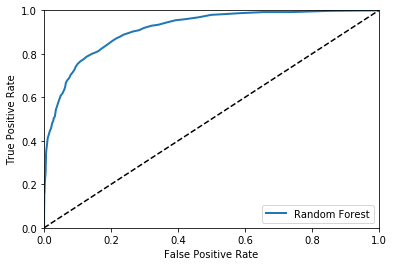

In [44]:
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores_forest)

0.914032793124937

In [47]:
rfc.feature_importances_

array([0.1786303 , 0.08574666, 0.06834319, 0.07386573, 0.06722487,
       0.06099526, 0.08173534, 0.07889633, 0.08982998, 0.10030633,
       0.10959976, 0.00282772, 0.00199854])

In [48]:
#Random Forest Classifier Hyperparameter Tuning

max_depth = [3, None]
n_estimators = [100, 200, 500, 1000]
min_samples_split = [1, 3, 10]
min_samples_leaf = [1, 3, 10]
bootstrap = [True, False]
criterion = ["gini", "entropy"]

params = {"max_depth": [3, None],
          'n_estimators': [100, 200, 500, 1000],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [49]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

In [50]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [51]:
rf_random.best_estimator_.fit(X_train, y_train)

y_train_predrf = cross_val_predict(rf_random.best_estimator_, X_train, y_train, cv=5)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predrf))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predrf))
print('Cross Validation Score: \n' ,cross_val_score(rf_random.best_estimator_, X_train, y_train, cv=5, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predrf))

Accuracy Score: 
 0.8847591818781614
Confusion Matrix: 
 [[3544  127]
 [ 397  479]]
Cross Validation Score: 
 [0.87472527 0.88351648 0.91428571 0.87472527 0.88351648 0.88791209
 0.88351648 0.87444934 0.89207048 0.87885463]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      3671
           1       0.79      0.55      0.65       876

    accuracy                           0.88      4547
   macro avg       0.84      0.76      0.79      4547
weighted avg       0.88      0.88      0.88      4547



In [52]:
y_prob_forest = cross_val_predict(rf_random.best_estimator_, X_train, y_train, cv=5, method='predict_proba')

In [53]:
y_scores_forest = y_prob_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

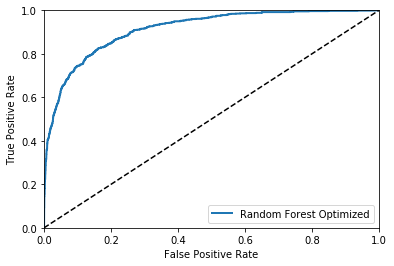

In [54]:
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest Optimized')
plt.legend()
plt.show()

In [55]:
roc_auc_score(y_train, y_scores_forest)

0.9128015272113033

---

### Multi Layer Perceptron

In [53]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=200)

In [54]:
params = {
    'hidden_layer_sizes': [(100), (500), (1000,), (5000), (1000, 1000)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.01, 1, 2, 5],
    'learning_rate': ['constant','adaptive', 'invscaling'],
}

In [55]:
from sklearn.model_selection import RandomizedSearchCV

clf_random = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 3, verbose=2, random_state=42, n_jobs = -1)
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu',
                                                 

In [56]:
clf_random.best_params_

{'solver': 'lbfgs',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 5000,
 'alpha': 0.0001,
 'activation': 'relu'}

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf_random.best_estimator_.fit(X_train, y_train)

y_train_predmlp = cross_val_predict(clf_random.best_estimator_, X_train, y_train, cv=5)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predmlp))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predmlp))
print('Cross Validation Score: \n' ,cross_val_score(clf_random.best_estimator_, X_train, y_train, cv=5, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predmlp))

Accuracy Score: 
 0.8570486034748186
Confusion Matrix: 
 [[3349  322]
 [ 328  548]]
Cross Validation Score: 
 [0.84945055 0.87362637 0.85038504 0.85038504 0.86468647]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      3671
           1       0.63      0.63      0.63       876

    accuracy                           0.86      4547
   macro avg       0.77      0.77      0.77      4547
weighted avg       0.86      0.86      0.86      4547



In [39]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, params, n_jobs=-1, cv=3, verbose=2)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed: 63.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.01, 1, 2, 5, 10],
                         'hidden_layer_sizes': [(50,

In [40]:
clf.best_params_

{'activation': 'relu',
 'alpha': 1,
 'hidden_layer_sizes': (1000,),
 'learning_rate': 'adaptive',
 'solver': 'lbfgs'}

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf.best_estimator_.fit(X_train, y_train)

y_train_predmlp = cross_val_predict(clf.best_estimator_, X_train, y_train, cv=5)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predmlp))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predmlp))
print('Cross Validation Score: \n' ,cross_val_score(clf.best_estimator_, X_train, y_train, cv=5, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predmlp))

Accuracy Score: 
 0.8676050142951397
Confusion Matrix: 
 [[3424  247]
 [ 355  521]]
Cross Validation Score: 
 [0.85054945 0.88131868 0.89010989 0.86813187 0.84615385 0.88131868
 0.85274725 0.86123348 0.85903084 0.86123348]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      3671
           1       0.68      0.59      0.63       876

    accuracy                           0.87      4547
   macro avg       0.79      0.76      0.78      4547
weighted avg       0.86      0.87      0.86      4547



### Conclusions

The multilayer perceptron model performed similarly to the Random Forest in this case. Random Forest slightly outperformed the MLP and took much less time to find optimal parameters and ultimately, run. In this case, I would use the Random Forest model to run a dataset like this. Neural Networks are probably better suited to text, image and audio data. 

Random Forest is also advantageous in this case due to its ease of training compared to NN MLP. There are many different parameters in NN to choose from so it'll ultimately take more time (and experience) to train it well. 

Next steps: 

- Try different input variables - use random forest feature importance to determine best features for the model
- Improve the scores of the NN
- Try different target classification